   # Trabalho de Projetos de Máquinas
   
   ### - Universidade Federal do Rio de Janeiro - Macaé
   
   #### - Título: Técnicas de Aprendizado de Máquina na Engenharia Mecânica
   
   #### - Autor: Pietro Sales
   
   ##### - Referências: 
   
   [1].	Li Y, Yang Y, Li G, Xu M, Huang W. A fault diagnosis scheme for planetary gearboxes using modified multi-scale symbolic dynamic entropy and mRMR feature selection. Mech Syst Signal Process. 2017; 91: 295±312. https://doi.org/10.1016/j.ymssp.2016.12.040   
   
[2].	Case Western Reserve University Bearing Data Centre website. Disponível em: <http://csegroups.case.edu/bearingdatacenter>. Acesso em: 16 jul. 2018.


[3].	Hui, Kar Hoou; Ooi, Ching Sheng; Lim, Meng Hee; Leong, Mohd Salman; Al-Obaidi, Salah Mahdi. PLoS ONE. 12/20/2017, Vol. 12 Issue 12, p1-10. 10p. DOI: 10.1371/journal.pone.0189143


[4].	Simplifying Logistic Regression. DZONE. Disponível em: <https://dzone.com/articles/machinex-simplifying-logistic-regression>. Acesso em: 16 jul. 2018.


[5].	Logistic Regression. ML CHEATSHEET. Disponível em: <http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#gradient-descent>. Acesso em: 16 jul. 2018.

   #### - Fonte dos dados:
Experimento e dados crus obtidos por [2].

Dados utilizados no treino dos modelos foram tratados por [1].

# Algoritmo

## Passo preliminar: Visualização dos dados de vibração obtidos por [2]

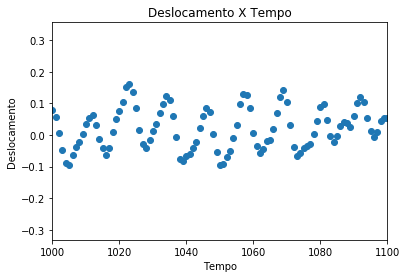

In [57]:
raw_normal_data = pd.read_csv("X097_DE_time.csv", header=None)

x = np.arange(0,243938)

plt.scatter(x,raw_normal_data)
plt.xlim(1000, 1100)
plt.xlabel("Tempo")
plt.ylabel("Deslocamento")
plt.title("Deslocamento X Tempo")
plt.savefig('fig1.png', dpi = 300)
plt.show()

# 1) Importar bibliotecas

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# 2) Ler e visualizar os dados

In [47]:
training_data = pd.read_csv("training.csv")
testing_data = pd.read_csv('testing.csv')
labels_data = pd.read_csv('target.csv')

training_data.head(10)

,skewness factor,kurtosis factor,crest factor,shape factor,impulse factor,margin factor
0,-0.301250,2.481710,2.775495,1.194182,3.314447,3.826980
1,-0.192214,2.531206,2.426969,1.206328,2.927721,3.361278
2,-0.175213,2.559090,2.492546,1.215273,3.029125,3.503304
3,-0.029234,2.316718,2.469554,1.209672,2.987349,3.467161
4,0.022078,2.708726,2.815036,1.247238,3.511020,4.138479
5,-0.211558,2.755039,2.957466,1.226729,3.628010,4.241124
6,0.140896,2.794350,2.661178,1.267598,3.373305,4.018224
7,-0.316860,2.615248,2.822367,1.220262,3.444027,4.034513
8,-0.044224,2.482811,2.793800,1.218165,3.403310,3.934936
9,-0.242878,2.682910,2.700426,1.217775,3.288513,3.812402


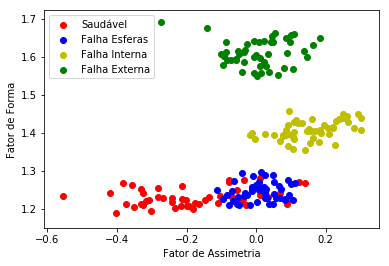

In [58]:
skewness_factor = training_data['skewness factor']
shape_factor = training_data['shape factor']

x_0 = skewness_factor[0:50]
y_0 = shape_factor[0:50]

x_1 = skewness_factor[50:100]
y_1 = shape_factor[50:100]

x_2 = skewness_factor[100:150]
y_2 = shape_factor[100:150]

x_3 = skewness_factor[150:200]
y_3 = shape_factor[150:200]

plt.scatter(x_0,y_0, c='r', label = 'Saudável')
plt.scatter(x_1,y_1, c='b', label = 'Falha Esferas')
plt.scatter(x_2,y_2, c='y', label = 'Falha Interna')
plt.scatter(x_3,y_3, c='g', label = 'Falha Externa')
plt.xlabel("Fator de Assimetria")
plt.ylabel("Fator de Forma")
plt.legend()
plt.savefig('fig2.png', dpi = 300)
plt.show()

# 3) Regressão Logística

## 3.1) Treinando o modelo utilizando Fator de Forma e Assimetria

In [63]:
X_train = training_data[['skewness factor','kurtosis factor']].values
X_test = testing_data[['skewness factor','kurtosis factor']].values
y_train = labels_data.values
y_test = labels_data.values

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Precisão: {:.2f}'.format(logreg.score(X_test, y_test)))

Precisão: 0.81


## 3.2) Curva de decisão utlizando Fator de Forma e Assimetria

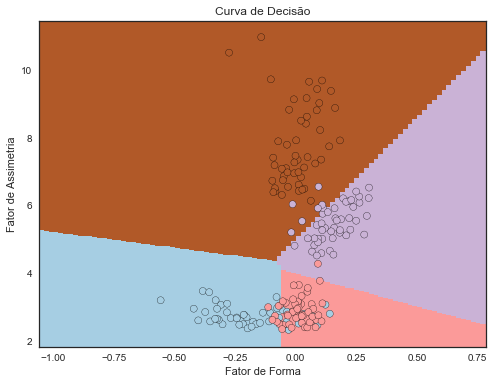

In [68]:
X = X_train
y = y_train
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Fator de Forma')
plt.ylabel('Fator de Assimetria')
plt.title("Curva de Decisão")
plt.savefig('fig3.png', dpi=300)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## 3.3) Treinando o modelo utilizando todos parâmetros 

In [83]:
X_train = training_data.values
X_test = testing_data.values
y_train = labels_data.values
y_test = labels_data.values

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('\nPrecisão da regressão logística: {:.2f}'.format(logreg.score(X_test, y_test)))


Precisão da regressão logística: 0.83


# 4) Rede Neural

In [81]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(6,)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

history = model.fit(X_train, labels_data.values,
                    batch_size=1,
                    epochs=200,
                    verbose=2,
                   validation_data=(X_test, labels_data.values))

Train on 200 samples, validate on 200 samples
Epoch 1/200
 - 1s - loss: 1.4186 - acc: 0.2300 - val_loss: 1.3810 - val_acc: 0.2500
Epoch 2/200
 - 0s - loss: 1.3757 - acc: 0.2400 - val_loss: 1.3406 - val_acc: 0.2500
Epoch 3/200
 - 0s - loss: 1.2998 - acc: 0.3750 - val_loss: 1.1970 - val_acc: 0.5150
Epoch 4/200
 - 0s - loss: 1.0897 - acc: 0.5050 - val_loss: 0.9723 - val_acc: 0.4900
Epoch 5/200
 - 0s - loss: 0.8997 - acc: 0.5350 - val_loss: 0.8275 - val_acc: 0.5400
Epoch 6/200
 - 0s - loss: 0.7973 - acc: 0.5600 - val_loss: 0.7638 - val_acc: 0.5900
Epoch 7/200
 - 0s - loss: 0.7556 - acc: 0.6300 - val_loss: 0.7278 - val_acc: 0.6650
Epoch 8/200
 - 0s - loss: 0.7235 - acc: 0.6600 - val_loss: 0.6956 - val_acc: 0.7050
Epoch 9/200
 - 0s - loss: 0.6897 - acc: 0.7350 - val_loss: 0.6645 - val_acc: 0.7500
Epoch 10/200
 - 0s - loss: 0.6569 - acc: 0.7100 - val_loss: 0.6350 - val_acc: 0.7500
Epoch 11/200
 - 0s - loss: 0.6243 - acc: 0.7550 - val_loss: 0.6344 - val_acc: 0.7800
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.2162 - acc: 0.8850 - val_loss: 0.2297 - val_acc: 0.9000
Epoch 98/200
 - 0s - loss: 0.2077 - acc: 0.8950 - val_loss: 0.2288 - val_acc: 0.8900
Epoch 99/200
 - 0s - loss: 0.2085 - acc: 0.9050 - val_loss: 0.2271 - val_acc: 0.8950
Epoch 100/200
 - 0s - loss: 0.2062 - acc: 0.8950 - val_loss: 0.2331 - val_acc: 0.8850
Epoch 101/200
 - 0s - loss: 0.2027 - acc: 0.9050 - val_loss: 0.2268 - val_acc: 0.8900
Epoch 102/200
 - 0s - loss: 0.2079 - acc: 0.9000 - val_loss: 0.2276 - val_acc: 0.9000
Epoch 103/200
 - 0s - loss: 0.2098 - acc: 0.8950 - val_loss: 0.2464 - val_acc: 0.8900
Epoch 104/200
 - 0s - loss: 0.2128 - acc: 0.9050 - val_loss: 0.2278 - val_acc: 0.9000
Epoch 105/200
 - 0s - loss: 0.2053 - acc: 0.9050 - val_loss: 0.2568 - val_acc: 0.8750
Epoch 106/200
 - 0s - loss: 0.2081 - acc: 0.9000 - val_loss: 0.2221 - val_acc: 0.8950
Epoch 107/200
 - 0s - loss: 0.2139 - acc: 0.9000 - val_loss: 0.2304 - val_acc: 0.9000
Epoch 108/200
 - 0s - loss: 0.2030 - acc: 0.9050 - val_lo

Epoch 193/200
 - 0s - loss: 0.1991 - acc: 0.9050 - val_loss: 0.2538 - val_acc: 0.8850
Epoch 194/200
 - 0s - loss: 0.2074 - acc: 0.9000 - val_loss: 0.2198 - val_acc: 0.9000
Epoch 195/200
 - 0s - loss: 0.1983 - acc: 0.9100 - val_loss: 0.2346 - val_acc: 0.8650
Epoch 196/200
 - 0s - loss: 0.2017 - acc: 0.9050 - val_loss: 0.2284 - val_acc: 0.8800
Epoch 197/200
 - 0s - loss: 0.2047 - acc: 0.9000 - val_loss: 0.2222 - val_acc: 0.8950
Epoch 198/200
 - 0s - loss: 0.2003 - acc: 0.9000 - val_loss: 0.2177 - val_acc: 0.9000
Epoch 199/200
 - 0s - loss: 0.1988 - acc: 0.9100 - val_loss: 0.2370 - val_acc: 0.8950
Epoch 200/200
 - 0s - loss: 0.2083 - acc: 0.9000 - val_loss: 0.2244 - val_acc: 0.9000
